# Project 1 - K-Means Clustering

Due Thursday Jan 30th at 11:59pm

**Chat GPT Policy:** This assignment will be worked on in groups of 3 (assigned randomly) and chat gpt can be used for "small code help" such as if you forget syntax or numpy function names, etc. but not for larger prortions (i.e. don't copy the questions into chat gpt)

-- **Insert First and Last Name** --

-- **Please Type the Honor Pledge** -- (points will be deducted if not)

# Overview of K-Means Clustering

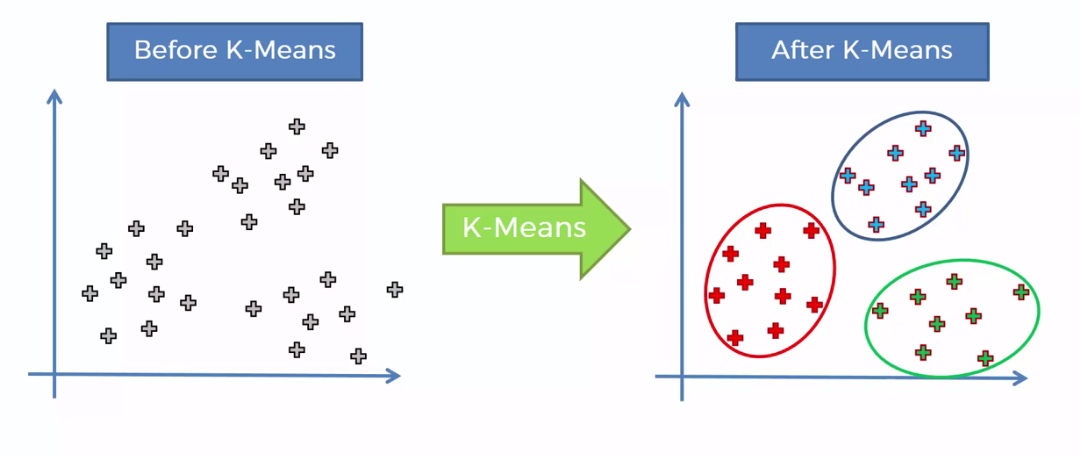

### The general steps in the K-means clustering algorithm are:
1. Choose the number of clusters: Decide on the value of \(k\), which is the number of clusters you want to create. K-means is an unsuperised learning method and in this example k is given.
2. Initialize centroids: Assign each data point randomly to a cluster, then compute each centroid (mean of cluster)
3. Calculate distances: For each data point, calculate the distance between it and each centroid.
4. Assign data points to clusters: Assign each data point to the cluster with the closest centroid.
5. Recalculate centroids: Find the new location of each centroid by calculating the mean of all the data points in its cluster.
6. Repeat: Repeat steps 3–5 until the centroids stop changing.      

### Further Explaination:
The K-means clustering algorithm is an iterative process that continues until the model stops improving. The algorithm outputs the final cluster centroids and the assignment of each data point to a cluster once convergence is achieved.            To determine the optimal number of clusters, you can use the elbow method. This method plots the mean distance between data points and centroids against a range of \(k\) values. The "elbow point" is where the rate of decrease in distance shifts, and this point usually represents the ideal \(k\).

## Cost function (Sum of Squared Distances)

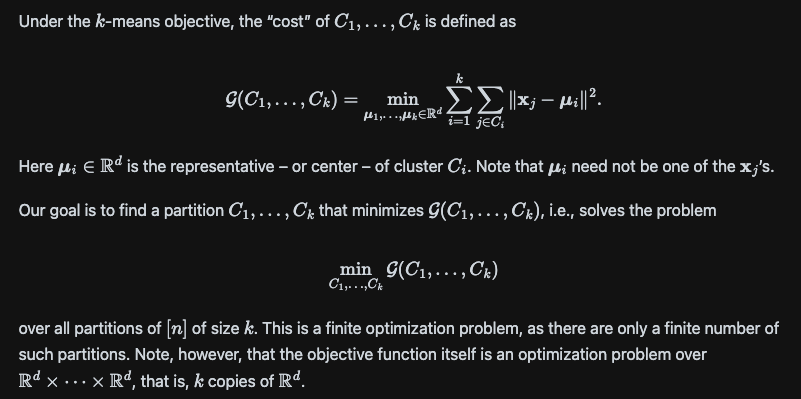

In [ ]:
# Install packages
!pip install ucimlrepo

In [ ]:
# Load packages
import numpy as np
import pandas as pd
from numpy import linalg as LA
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
import seaborn as sns

# Data and Exploratory Data Analyis (EDA)

**Goal:** Cluster The Presence of Heart Dissease in Patients

Source: https://archive.ics.uci.edu/dataset/45/heart+disease

Labels: 0 (no presence) to 4

**Clusters:** k = 5

In [ ]:
# Fetch Dataset
heart_disease = fetch_ucirepo(id=45)

# Data (as pandas dataframes - split into data and labels)
X = heart_disease.data.features
y = heart_disease.data.targets

# Metadata
print(heart_disease.metadata)

# Variable Information
#print(heart_disease.variables)

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [ ]:
# View Snapshot of Data
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


### 1. Are there any missing data? Check for nan values. If there are any missing data, remove them.

In [ ]:
# Check for missing data



In [ ]:
# Remove missing data



### 1.5 Remove Binary Columns

In [ ]:
# Keep only continuous columns
X = X[['age', 'cp', 'trestbps', 'chol', 'restecg', 'thalach',
       'oldpeak', 'slope', 'ca', 'thal']]
X.head()

,age,cp,trestbps,chol,restecg,thalach,oldpeak,slope,ca,thal
0,63,1,145,233,2,150,2.3,3,0.0,6.0
1,67,4,160,286,2,108,1.5,2,3.0,3.0
2,67,4,120,229,2,129,2.6,2,2.0,7.0
3,37,3,130,250,0,187,3.5,3,0.0,3.0
4,41,2,130,204,2,172,1.4,1,0.0,3.0


### 2. Turn data into a numpy array

In [ ]:
# Turn data into a numpy array



### 3. How many patients are included in the dataset? (assume each line is a unique patient)

In [ ]:
# How many patients are included in the dataset? (assume each line is a unique patient)



### 4. What dimension is our dataset in? (how many columns are there)

In [ ]:
# What dimension is our dataset in? (how many columns are there)



### 5. How many unique label categories are there and what are they? (show with code)

In [ ]:
# How many unique label categories are there and what are they? (show with code)



### 6. In *k*-Means clustering, what does *k* represent? Is this a supervised or unsupervised classification method?

In [ ]:
# What is k? Will this be a supervised or unsupervised method?



### 7. Should we standardize the data? If so, explain why and standardize the data. If not, explain why not.(Hint: To standardize, you must first calculate the mean and standard deviation of each column)

In [ ]:
# Standardize the data and explain which method you chose and why this needs to be done (hint - compute the mean and standared deviation first)



# Starter Code (Lloyd's Algorithm)

You will be using the code provided that we discussed in class as a start for this project. Please annotate the code in a way that shows you understand the purpose of each line/piece of the code and relate it to equations/math we learned in class. **<- This is very important.** An example annotation is shown below for a function that calcluates the l2 norm of two vectors (this code is for example only, you will not need it for the project).

In [ ]:
def l2_norm(v1, v2):
    """
    Calculates the L2 norm (Euclidean distance) between two vectors.

    Parameters:
        v1 (list or numpy.ndarray): The first vector.
        v2 (list or numpy.ndarray): The second vector.

    Returns:
        float: The L2 norm of the two vectors.
    """

    # Convert vectors to numpy arrays if they aren't already
    v1 = np.array(v1)
    v2 = np.array(v2)

    # Check if vectors have the same length
    if len(v1) != len(v2):
        raise ValueError("Vectors must have the same length.")

    # Calculate the element-wise squared difference
    diff_squared = (v1 - v2) ** 2

    # Sum the squared differences
    sum_of_squares = np.sum(diff_squared)

    # Return the square root of the sum
    return np.sqrt(sum_of_squares)

In [ ]:
def opt_reps(X, k, assign):
    (n, d) = X.shape
    reps = np.zeros((k, d))
    for i in range(k):
        in_i = [j for j in range(n) if assign[j] == i]
        reps[i,:] = np.sum(X[in_i,:],axis=0) / len(in_i)
    return reps

def opt_clust(X, k, reps):
    (n, d) = X.shape
    dist = np.zeros(n)
    assign = np.zeros(n, dtype=int)
    for j in range(n):
        dist_to_i = np.array([LA.norm(X[j,:] - reps[i,:]) for i in range(k)])
        assign[j] = np.argmin(dist_to_i)
        dist[j] = dist_to_i[assign[j]]
    G = np.sum(dist ** 2) # sum of squared distances - similar to inertia
    print(G)
    return assign

def kmeans(rng, X, k, maxiter=5):
  (n, d) = X.shape
  assign = rng.integers(0,k,n)
  reps = np.zeros((k, d), dtype=int)
  for iter in range(maxiter):
      reps = opt_reps(X, k, assign)
      assign = opt_clust(X, k, reps)
  return assign



# Your Turn

### 8. Use the kmeans and opt_reps functions to obtain the centers of each of the 5 clusters.

In [ ]:
# hint: you need to create a random number generator as an input to kmeans (rng)
# define a seed and random number generator for the implementation input
seed = 123
rng = np.random.default_rng(seed)

# Use the kmeans and opt_reps functions to obtain the centers of each of the 5 clusters


### 9. Explain the output you received. What are the dimensions of the output and why? What do the values represent? Include your answer using markdown in this text cell.

### 10. Plot your clusters in 2D. Color the points according to what cluster they are assigned to. You can use any two columns for the x and y axes of the plots.

In [ ]:
# Plot your clusters (color coded) in 2D (Can choose any two columns)



### 11. Select 4 variables from the data set. Create a plot that shows all of your selected variables on the x-axis and the y-axis. Color the points according to the assigned cluster. (Hint: Review the final plot Section 1.1 of the Mathematical Methods in Data Science textbook)

In [ ]:
# Plot all possible combinations of your clusters (color coded)



### 12. Experiment with your choice of k (ex. try k = 2). What do you notice and how does it tie into our data (presence of heart disease)?

In [ ]:
# Experiment with your choice of k (try k = 2). What do you notice and how does it tie into our data (presence of heart disease)?



### 13.  An elbow plot is a tool to subjectively identify the best choise of *k* using the *k*-means Clustering cost function. Reference Lab2 for additional details on what an elbow plot is and looks like. Create an Elbow Plot and choose the best value of *k* for our data set. You will need to adjust the code given so that the function(s) return the sum of squared distances along with the cluster assignments (aka the variable "assign"). This will allow you to plot the *k* on the x-axis and the sum of squared distances on the y-axis as you iterate through each value of *k*. Test $1 \leq $ *k* $\leq 10$.

In [ ]:
# Create an Elbow Plot (k on the x axis and cost function on the y axis) and choose the best value of k
# You will need to adjust the code given so that the function(s) return the sum of squared distances along with the cluster assignments (aka the variable "assign")
# This will allow you to plot the k on the x axis and the sum of squared distances on the y axis as you iterate through each value of k
# Test k=1 though k = 10 (inclusive)



### 14.  The starter code does not output a cost function that penalizes for larger values of *k*. Why is that an issue? If *k* was equal to our number of data points would that tell us anything? How could we adjust the code to ensure our optimal *k* value is not too large?

In [ ]:
# The starter code does not output a cost function that penalizes for larger values of k.
# Why is that an issue? If k was equal to our number of data points would that tell us anything?
# How could we adjust the code to ensure our optimal k value is not too large?

